In [23]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf
from statsmodels import api as sm

In [17]:
stocks =['AAPL','MSFT','FB','NFLX','AMZN']
faang_list_df = []
for stock in stocks:
  returns = yf.Ticker(stock)
  returns = returns.history(period="1y")
  returns['returns'] =  returns['Close'].pct_change()

  returns.rename(columns={'returns': stock}, inplace=True)
  returns = returns[stock]
  faang_list_df.append(returns)

faang_all_returns_df =pd.DataFrame(faang_list_df).T
faang_all_returns_df.head()

,AAPL,MSFT,FB,NFLX,AMZN
Date,,,,,
2021-01-14,NaN,NaN,NaN,NaN,NaN
2021-01-15,-0.013731,-0.001737,0.023286,-0.005750,-0.007425
2021-01-19,0.005427,0.017823,0.038749,0.007611,0.005319
2021-01-20,0.032856,0.036500,0.024435,0.168543,0.045700
2021-01-21,0.036658,0.002808,0.020151,-0.011086,0.013363


In [18]:
print(faang_all_returns_df.describe())

             AAPL        MSFT          FB        NFLX        AMZN
count  253.000000  253.000000  253.000000  253.000000  253.000000
mean     0.001296    0.001588    0.001350    0.000449    0.000238
std      0.015561    0.013466    0.018456    0.020184    0.015185
min     -0.041674   -0.042323   -0.050515   -0.074003   -0.075649
25%     -0.007625   -0.005327   -0.010279   -0.009125   -0.008528
50%      0.001410    0.000732    0.000116    0.001080    0.000184
75%      0.011989    0.010445    0.014059    0.010321    0.009787
max      0.053851    0.042114    0.072973    0.168543    0.046927


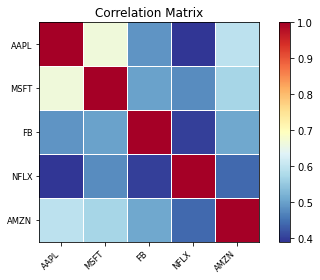

In [39]:
#calculate correlation
correlation_df = faang_all_returns_df.corr()
#plot correlation
sm.graphics.plot_corr(correlation_df,xnames=list(correlation_df.columns))
plt.show()

<Figure size 432x288 with 0 Axes>

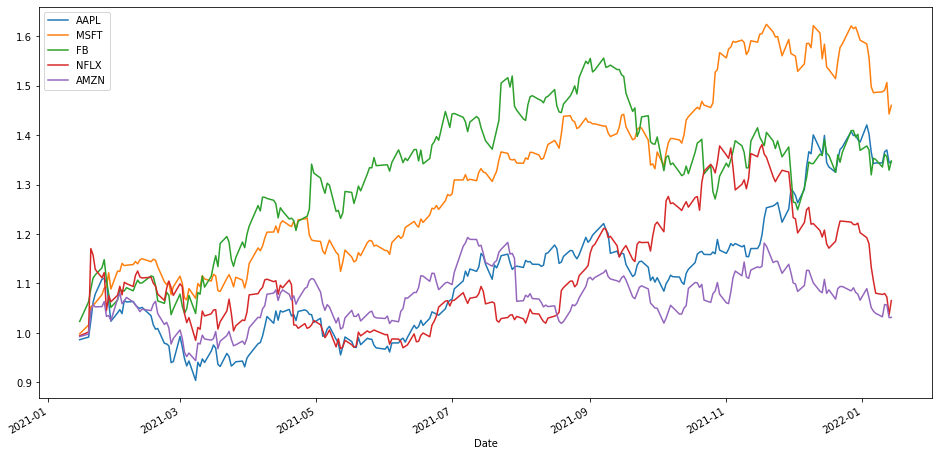

In [36]:
fig = plt.figure()
(faang_all_returns_df + 1).cumprod().plot(figsize=(16, 8))
plt.show()